# **Customer Segmentation**
- Score customers based on their behaviors and purchasing data

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">Author: Muhammad Adil Naeem</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-green?style=for-the-badge&logo=github)](https://github.com/muhammadadilnaeem) 

[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter)](https://twitter.com/adilnaeem0) 

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-adil-naeem-26878b2b9/)  

### **Objective of the Analysis**
- The main objective of this analysis is to understand customer segmentation for a mall. 
- We'll be focusing on clustering techniques to identify different groups of customers based on their demographic and behavioral attributes. 
- This segmentation can help the business or stakeholders in targeting specific customer groups more effectively, designing tailored marketing strategies, and improving customer satisfaction.

### **Dataset Description**

This dataset is taken from [kaggle](https://www.kaggle.com/datasets/joebeachcapital/customer-segmentation).

The dataset consists of the following attributes:

1. **CustomerID**: Unique identifier for each customer.
   
2. **Gender**: Gender of the customer.
   
3. **Age**: Age of the customer.
   
4. **Annual Income (k$)**: Annual income of the customer in thousands of dollars.
   
5. **Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature.

## **Let's Start Exploring The Dataset**


**Data Exploration and Cleaning**
Let's explore the dataset to understand its characteristics and check for any necessary cleaning or feature engineering steps.

- Check for missing values.
- Summary statistics of the data.
- Distribution of each attribute.

#### **import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#### **Load the dataset**

In [2]:
data = pd.read_csv("Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### **Checking Shape of the dataset**

In [3]:
print(f"This dataset consist of {data.shape[0]} rows and {data.shape[1]} columns.")

This dataset consist of 200 rows and 5 columns.


#### **Checking Detailed Information about dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### **Summary statistics of the data**

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### **Let's Explore the Dataset By Making A Histogram**

<Axes: xlabel='Age', ylabel='Count'>

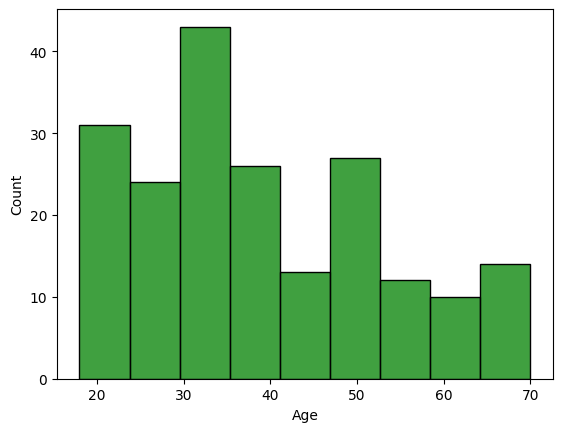

In [6]:
# for age
sns.histplot(data["Age"],color="green")

<Axes: xlabel='CustomerID', ylabel='Count'>

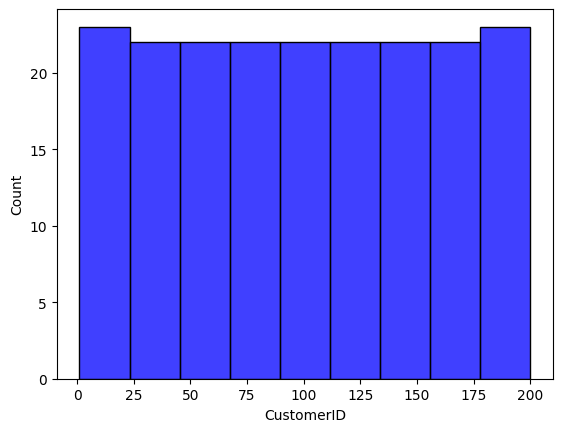

In [7]:
# for CustomerID
sns.histplot(data["CustomerID"],color="blue")

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

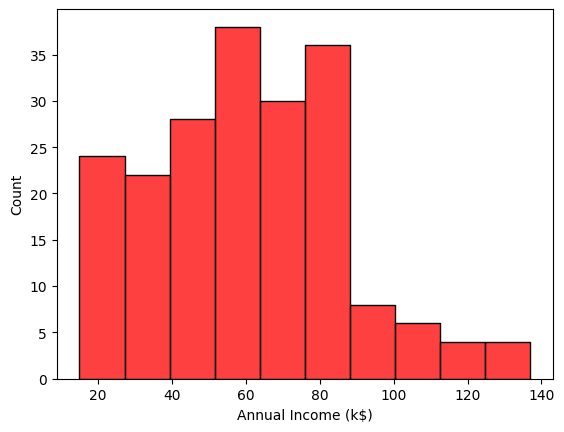

In [8]:
# for Annual Income (k$)
sns.histplot(data["Annual Income (k$)"],color="r")

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

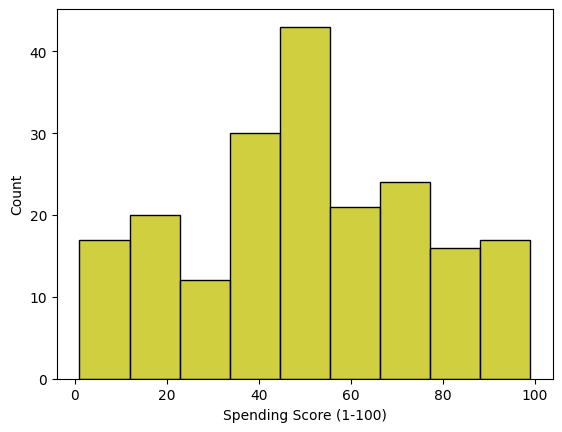

In [9]:
# for Spending Score (1-100)
sns.histplot(data["Spending Score (1-100)"],color="y")

### **Data Exploration and Cleaning Summary**

1. **Missing Values**: There are no missing values in the dataset.

2. **Summary Statistics**:
   - The dataset contains 200 entries.
   - Customers' ages range from 18 to 70 years.
   - Annual incomes range from $15,000 to $137,000.
   - Spending scores range from 1 to 100.
  
The histograms for each attribute show a fairly even distribution for most variables, with some variations.

### **Feature Engineering**

Since the dataset is already clean, the next step is to perform feature engineering. We'll:

1. Encode the 'Gender' attribute to numerical values for model training.
   
2. Scale the features to ensure they are on a comparable scale.

#### **Encode 'Gender' attribute**

In [10]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

#### **Select features for clustering**

In [11]:
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#### **Scale the features**

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### **Convert scaled features back to a DataFrame for clarity**

In [13]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [14]:
scaled_df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


### **Clustering Model Training**

We'll train three variations of clustering models:

1- **K-Means Clustering**

2- **Agglomerative Clustering**

3- **DBSCAN**

In [15]:
# importing models from sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

### **K-Means Clustering with different number of clusters**

In [16]:
kmeans_results = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
    kmeans_results[k] = {'model': kmeans, 'labels': kmeans_labels, 'silhouette_score': silhouette_avg}


#### **Best K-Means model based on silhouette score**

In [17]:
best_k = max(kmeans_results, key=lambda k: kmeans_results[k]['silhouette_score'])
best_kmeans_model = kmeans_results[best_k]

In [18]:
print(f"Best K-Means model: {best_k} clusters with silhouette score {best_kmeans_model['silhouette_score']}")

Best K-Means model: 4 clusters with silhouette score 0.29010917402310876


#### **Elbow Plot for KMeans**

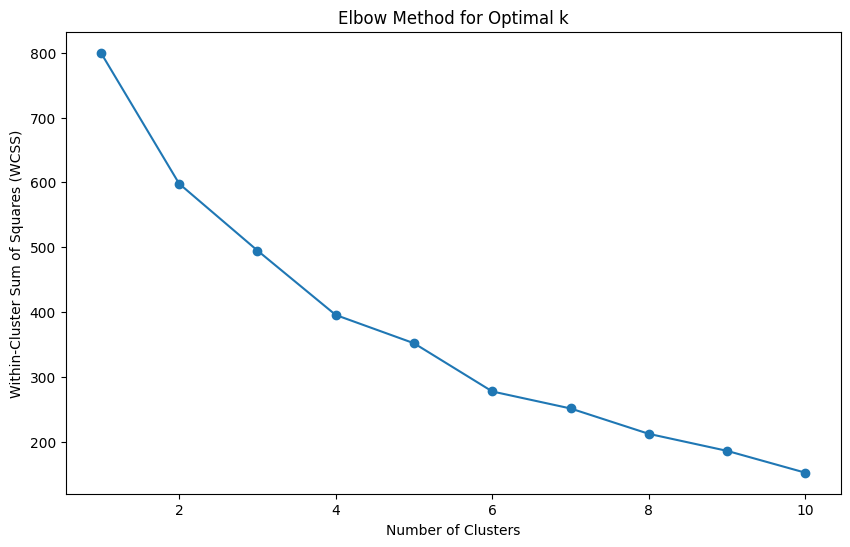

In [28]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

### **Agglomerative Clustering with different number of clusters**

In [19]:
agg_results = {}
for k in range(2, 6):
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, agg_labels)
    agg_results[k] = {'model': agg, 'labels': agg_labels, 'silhouette_score': silhouette_avg}

#### **Best Agglomerative Clustering model based on silhouette score**

In [20]:
best_agg = max(agg_results, key=lambda k: agg_results[k]['silhouette_score'])
best_agg_model = agg_results[best_agg]

In [21]:
print(f"Best Agglomerative Clustering model: {best_agg} clusters with silhouette score {best_agg_model['silhouette_score']}")

Best Agglomerative Clustering model: 5 clusters with silhouette score 0.28699413201651747


#### **Dendrogram for AgglomerativeClustering**

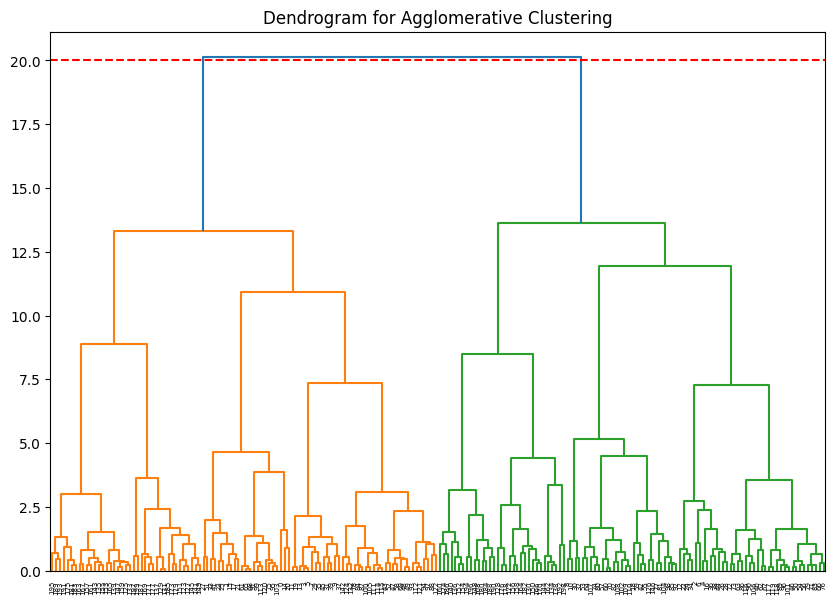

In [30]:
import scipy.cluster.hierarchy as shc

# Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Agglomerative Clustering")
dend = shc.dendrogram(shc.linkage(scaled_df, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')  # Adjust threshold as needed
plt.show()

### **DBSCAN with different epsilon values**

In [22]:
dbscan_results = {}
for eps in [0.3, 0.4, 0.5, 0.6]:
    dbscan = DBSCAN(eps=eps)
    dbscan_labels = dbscan.fit_predict(scaled_df)
    if len(set(dbscan_labels)) > 1:  # Valid clusters found
        silhouette_avg = silhouette_score(scaled_df, dbscan_labels)
        dbscan_results[eps] = {'model': dbscan, 'labels': dbscan_labels, 'silhouette_score': silhouette_avg}

#### **Best DBSCAN model based on silhouette score**

In [23]:
if dbscan_results:
    best_eps = max(dbscan_results, key=lambda eps: dbscan_results[eps]['silhouette_score'])
    best_dbscan_model = dbscan_results[best_eps]
    print(f"Best DBSCAN model: epsilon {best_eps} with silhouette score {best_dbscan_model['silhouette_score']}")
else:
    print("DBSCAN did not find valid clusters for the provided epsilon values.")

Best DBSCAN model: epsilon 0.6 with silhouette score 0.09383923210660092


#### **Function to describe clusters**

In [24]:
def describe_clusters(df, labels, num_clusters):
    df['Cluster'] = labels
    cluster_summary = {}
    for cluster in range(num_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        summary = {
            'Gender': cluster_data['Gender'].value_counts(normalize=True).to_dict(),
            'Age': cluster_data['Age'].describe().to_dict(),
            'Annual Income (k$)': cluster_data['Annual Income (k$)'].describe().to_dict(),
            'Spending Score (1-100)': cluster_data['Spending Score (1-100)'].describe().to_dict(),
        }
        cluster_summary[cluster] = summary
    return cluster_summary

#### **Scatter Plot for DBSCAN**

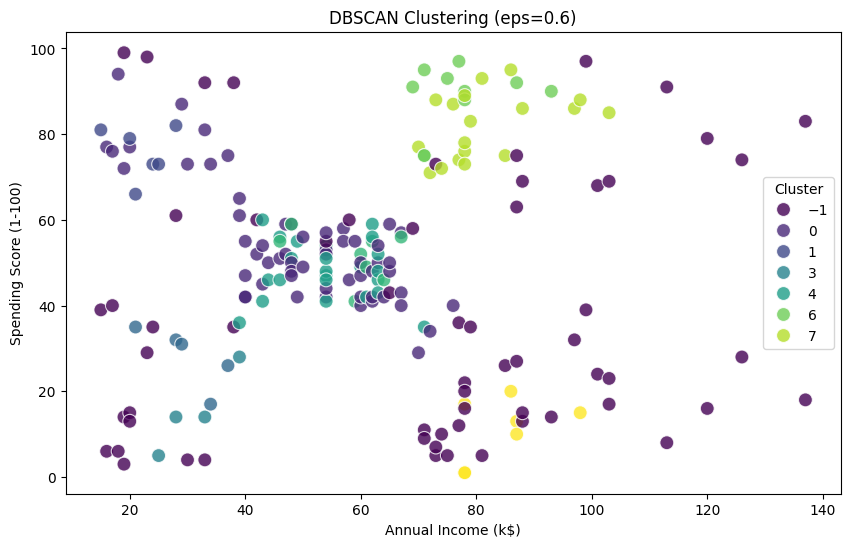

In [32]:
# Function to plot clustering results
def plot_clusters(df, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels, palette="viridis", s=100, alpha=0.8)
    plt.title(title)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()

# DBSCAN result
plot_clusters(data, best_dbscan_model['labels'], f'DBSCAN Clustering (eps={best_eps})')


#### **Using the best K-Means model as an example**

In [25]:
best_kmeans_labels = best_kmeans_model['labels']
num_clusters = best_k
kmeans_cluster_summary = describe_clusters(data.copy(), best_kmeans_labels, num_clusters)

import pprint
pprint.pprint(kmeans_cluster_summary)

{0: {'Age': {'25%': 48.75,
             '50%': 53.0,
             '75%': 63.25,
             'count': 60.0,
             'max': 70.0,
             'mean': 54.7,
             'min': 35.0,
             'std': 9.232037070689017},
     'Annual Income (k$)': {'25%': 37.75,
                            '50%': 48.0,
                            '75%': 60.0,
                            'count': 60.0,
                            'max': 79.0,
                            'mean': 46.9,
                            'min': 18.0,
                            'std': 14.798877648694072},
     'Gender': {0: 0.5666666666666667, 1: 0.43333333333333335},
     'Spending Score (1-100)': {'25%': 31.75,
                                '50%': 46.0,
                                '75%': 51.25,
                                'count': 60.0,
                                'max': 60.0,
                                'mean': 39.93333333333333,
                                'min': 3.0,
                              

----

# **Key Findings and Insights**

----


#### **Cluster 0: Mature, Lower-Income, Moderate Spending**
- **Age**: The average age is 54.7 years, with ages ranging from 35 to 70 years. The standard deviation is 9.23, indicating a moderately wide age range.
- **Annual Income**: The average annual income is $46,900, with a range from $18,000 to $79,000. The income distribution shows a standard deviation of 14.80, suggesting moderate variability in income.
- **Gender**: Approximately 56.67% of the customers in this cluster are Female, and 43.33% are Male.
- **Spending Score**: The average spending score is 39.93, with a range from 3 to 60. The standard deviation is 16.49, indicating varied spending behavior within this cluster.

**Insights**:
- This cluster consists of mature individuals with lower income and moderate spending behavior. Marketing strategies targeting budget-conscious, older customers may be effective for this group.

#### **Cluster 1: Middle-Aged, High-Income, Low Spending**
- **Age**: The average age is 41.26 years, with ages ranging from 19 to 59 years. The standard deviation is 10.77, indicating a wide age range.
- **Annual Income**: The average annual income is $88,500, with a range from $71,000 to $137,000. The income distribution shows a standard deviation of 16.53, suggesting considerable variability in income.
- **Gender**: Approximately 58.82% of the customers in this cluster are Male, and 41.18% are Female.
- **Spending Score**: The average spending score is 16.76, with a range from 1 to 39. The standard deviation is 9.88, indicating relatively low spending behavior within this cluster.

**Insights**:
- This cluster consists of middle-aged individuals with high income but low spending behavior. Strategies focusing on premium products or services may be less effective, and instead, promotions that encourage spending or loyalty programs might be more suitable.

#### **Cluster 2: Young, Varied Income, High Spending**
- **Age**: The average age is 28.69 years, with ages ranging from 18 to 40 years. The standard deviation is 7.11, indicating a younger age range.
- **Annual Income**: The average annual income is $60,905, with a range from $15,000 to $137,000. The income distribution shows a standard deviation of 29.02, suggesting significant variability in income.
- **Gender**: All customers in this cluster are Male.
- **Spending Score**: The average spending score is 70.24, with a range from 35 to 97. The standard deviation is 17.62, indicating high spending behavior within this cluster.

**Insights**:
- This cluster consists of young males with varied income levels and high spending behavior. Marketing strategies targeting young, male customers with high disposable income, such as lifestyle or tech products, may be effective.

#### **Cluster 3: Young, Moderate Income, High Spending**
- **Age**: The average age is 29.38 years, with ages ranging from 18 to 45 years. The standard deviation is 6.36, indicating a younger age range.
- **Annual Income**: The average annual income is $58,297, with a range from $16,000 to $120,000. The income distribution shows a standard deviation of 26.05, suggesting moderate variability in income.
- **Gender**: All customers in this cluster are Female.
- **Spending Score**: The average spending score is 64.44, with a range from 6 to 99. The standard deviation is 20.52, indicating high spending behavior within this cluster.

**Insights**:
- This cluster consists of young females with moderate income and high spending behavior. Marketing strategies targeting young, female customers with a focus on fashion, beauty, and lifestyle products may be effective.

## **Summary**

The clustering analysis has revealed distinct customer segments based on age, income, gender, and spending behavior. Each cluster represents a unique group with specific characteristics, enabling targeted marketing and personalized customer engagement strategies. 

### **Suggestions for Next Steps**

1. **Revisit the Model**: Consider adding more features or data points to improve clustering accuracy.
2. **Further Analysis**: Perform a deeper analysis of each cluster to understand specific preferences and behaviors.
3. **Tailored Marketing**: Develop marketing strategies tailored to each cluster to enhance customer engagement and satisfaction.
4. **Customer Feedback**: Collect feedback from customers in each cluster to refine marketing strategies and improve the overall shopping experience.